# 1. Initial Analysis (Establishing objectives, Defining data, Data cleaning, Expected Outcomes)

# Objective
Objective: To predict a passenger's likelihood of survival using available data on passengers, provided by the 'train' data on titanic's passengers. Predictive capability will be tested against 'test' data

# Description of Variables

In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [11]:
df = pd.read_csv('train.csv')

In [12]:
#sample of data from 'train' dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: Index for the list of passengers in the 'train' data

Survived(whether passenger survived): Categorical Variable; 0=NO, 1=Yes

pclass(Passenger Cabin Class): Categorical Variable; 1 = upper class, 2 = middle class, 3 = lower class

Name (passenger's name): Name is unlikely to influence probability of survival

Sex (passenger's gender): Categorical variable; should be tested as women were likely given priority in getting lifeboats, increasing their probability of survival

SibSP(# siblings / spouse on board): Continuous Variable 

Parch(# of parents / children on board): Continuous Variable

Cabin(cabin number): Designation of cabin where passenger stayed

Embarked(port where passenger boarded ship): Categorical Variable; C = Cherbourg, Q = Queenstown, S = Southampton

# Assumptions used in prediction
1. PassengerID will not have impact on survivability - will be removed from analysis

2. Survived will be the outcome (dependent variable), which will be predicted based on other variables

3. pclass splits passengers by wealthy (1st class) to poorer (3rd class), which may influence likelihood of getting priority of a lifeboat, which may increase chances of survivng

4. SipSP and Parch may influence probability of getting a lifeboat (those with more kids may be given priority) and can be tested.

5. Cabin number is unlikely to influence survivability by much. There may also be correlation with pclass as cabins with Pclass=1 may have higher survivability

6. Embarked may be tested as categorical variable.


# Data Cleaning

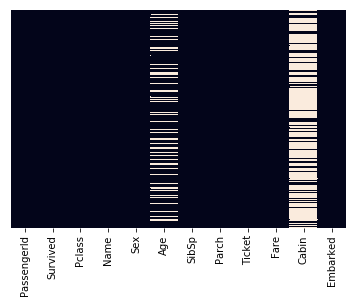

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

#visual plot showing missing data: on Age and Cabin

In [14]:
df['Age'].dropna().mean()

29.69911764705882

In [15]:
df['Age'].fillna(value = 30, method = None, inplace = True)
#replaced missing age with the average passenger age

In [16]:
#too many missing Cabin data, column will be dropped from analysis

In [17]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 2. Preliminary landscape analysis of Titanic Dataset

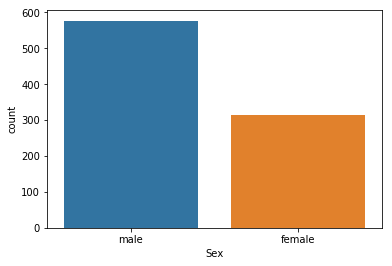

In [18]:
sns.countplot(x = 'Sex', data = df)
#2 times more males than females onboard

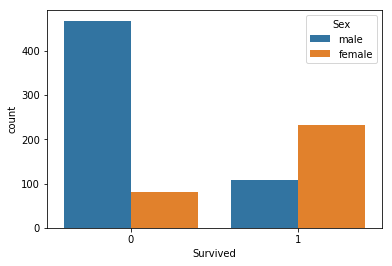

In [19]:
sns.countplot(x = 'Survived', data = df, hue = 'Sex')

# majority did not survive - majority that did not survive were male
# Of the survivors - 2 times more females than males

# While there are more Males than Females onboard, there were more female survivors, supporting the assumption that Gender is a strong determinant of survivability

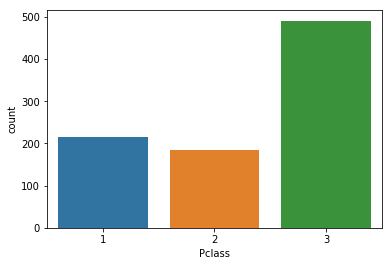

In [20]:
sns.countplot(x = 'Pclass', data = df)

# majority of passengers are in 3rd class 

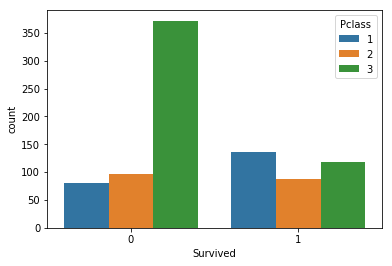

In [21]:
sns.countplot(x = 'Survived', data = df, hue = 'Pclass')

#of those that survived, more came from 1st class

# Majority of passengers are Pclass = 3, but majority survivors are Pclass = 1; This supports our assumption that cabin class contributes to survivability

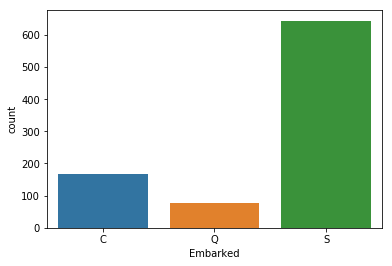

In [22]:
sns.countplot(x = 'Embarked', data = df, order = ['C', 'Q', 'S'])

# Majority of passengers boarded in Southampton

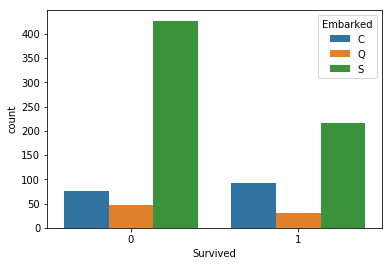

In [23]:
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', hue_order = ['C', 'Q', 'S'])

# Of the survivors follows the proportion of passengers by place of embarkation

# Embarking location could affect probability of survival

# 2. Building  Predictive Models for comparing accuracy of models

# Logistic regression model with Sex as dummy variable

In [24]:
gender_input = pd.get_dummies(df['Sex'], drop_first = True)
gender_input.head()

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
gender_df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis = 1)
gender_df = pd.concat([gender_df,gender_input], axis = 1)
x = gender_df.drop('Survived', axis = 1)
y = gender_df['Survived']

In [27]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 101)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predictions = model.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       207
          1       0.82      0.67      0.74       150

avg / total       0.80      0.80      0.79       357



In [35]:
print(confusion_matrix(y_test, predictions))

[[185  22]
 [ 50 100]]


# Logistic Regression on with Sex + Embark as dummy variables

In [36]:
embark_input = pd.get_dummies(df['Embarked'], drop_first = True)
embark_input.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
gender_embark_df = pd.concat([gender_df,embark_input], axis = 1)
x1 = gender_embark_df.drop('Survived', axis = 1)
y1 = gender_embark_df['Survived']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.4, random_state = 101)
model.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
predictions1 = model.predict(x1_test)

In [66]:
print(classification_report(y1_test, predictions1))

             precision    recall  f1-score   support

          0       0.78      0.90      0.84       207
          1       0.83      0.65      0.73       150

avg / total       0.80      0.80      0.79       357



In [68]:
print(confusion_matrix(y1_test, predictions1))

[[187  20]
 [ 52  98]]


# Logistic Regression with Sex + Embark + Pclass as dummy variables

In [85]:
pclass_input = pd.get_dummies(df['Pclass'], drop_first = True)
pclass_input.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [86]:
gender_embark_pclass_df = pd.concat([gender_embark_df,pclass_input], axis = 1).drop('Pclass', axis = 1)
gender_embark_pclass_df.head()
x2 = gender_embark_pclass_df.drop('Survived', axis = 1)
y2 = gender_embark_pclass_df['Survived']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.4, random_state = 101)
model.fit(x2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
predictions2 = model.predict(x2_test)

In [88]:
print(classification_report(y2_test, predictions2))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       207
          1       0.85      0.66      0.74       150

avg / total       0.81      0.81      0.80       357



In [89]:
print(confusion_matrix(y2_test, predictions2))

[[189  18]
 [ 51  99]]


# Logistic Regression on Pclass + Sex

In [90]:
pclass_sex_df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)

In [50]:
pclass_sex_df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [51]:
pclass_sex_df = pd.concat([pclass_sex_df,gender_input,pclass_input], axis = 1)

In [52]:
pclass_sex_df.drop(['SibSp','Parch','Fare'], axis = 1, inplace = True)
#removed Fare, Sibsb, and Parch as they are potentially less impactful on survival rates

x3 = pclass_sex_df.drop('Survived', axis = 1)
y3 = pclass_sex_df['Survived']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size = 0.4, random_state = 101)
model.fit(x3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions3 = model.predict(x3_test)

In [86]:
print(classification_report(y3_test, predictions3))

             precision    recall  f1-score   support

          0       0.76      0.95      0.84       207
          1       0.89      0.59      0.71       150

avg / total       0.81      0.80      0.79       357



In [87]:
print(confusion_matrix(y3_test, predictions3))

[[196  11]
 [ 62  88]]


In [53]:
# predictive ability decreases with only P-class + Sex, compared to P-class + Sex + Embark
# removing Fare, SibSp and Parch improves results marginally 

# Results when using Sex + Pclass + Embark as dummy variables is the best among the 4 approaches attempted

# 3. Applying Logistic model (Sex+Embark+Gender dummy), to predict 'Test' result

In [95]:
df_test = pd.read_csv('test.csv')
#import test data which was not used to train model

In [96]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
df_test.isnull().sum()
# data cleaning on 'test' data
# Age has 86 null values, Cabin has 327 null values, Fare has 1 null value

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [98]:
# Data cleaning (similar to train data) - replace missing age with average age = 30, and remove cabin

In [99]:
df_test['Age'].fillna(value = 30, method = None, inplace = True)

In [100]:
df_test.drop('Cabin', axis = 1, inplace = True)

In [101]:
df_test.groupby('Pclass')['Fare'].mean()
# Average fare cost by Pclass

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [102]:
# replace null value for Fare based on Pclass = 3
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [103]:
df_test = df_test.fillna(value = 12.459678)

In [104]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [105]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [106]:
sex_test_input = pd.get_dummies(df_test['Sex'], drop_first = True)
embarked_test_input = pd.get_dummies(df_test['Embarked'], drop_first = True)
pclass_test_input = pd.get_dummies(df_test['Pclass'], drop_first = True)

In [107]:
df_test_input = pd.concat([df_test, sex_test_input, embarked_test_input,pclass_test_input],axis = 1)

In [108]:
df_test_input.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], axis = 1, inplace = True)

In [109]:
df_test_input.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [116]:
#applying model (logistic reg with gender and embarked) onto test data, cast into a dataframe
test_predictions = pd.DataFrame(model.predict(df_test_input))
test_predictions.columns = ['Survived']
test_predictions.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [117]:
test_predictions = pd.concat([df_test['PassengerId'],test_predictions,], axis = 1)
test_predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [115]:
sample_output = pd.read_csv('Gender_submission.csv')

In [139]:
sample_output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [140]:
test_predictions.to_csv('test_predictions')

In [141]:
test_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


# Results submitted on Kaggle, returning an accuracy of 75% 